In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras import Sequential
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset =keras.utils.image_dataset_from_directory('Image Data base')

Found 199665 files belonging to 58 classes.


In [3]:
labels=dataset.class_names
labels

['Apple Apple scab',
 'Apple Black rot',
 'Apple Cedar apple rust',
 'Apple healthy',
 'Bacterial leaf blight in rice leaf',
 'Blight in corn Leaf',
 'Blueberry healthy',
 'Brown spot in rice leaf',
 'Cercospora leaf spot',
 'Cherry (including sour) Powdery mildew',
 'Cherry (including_sour) healthy',
 'Common Rust in corn Leaf',
 'Corn (maize) healthy',
 'Garlic',
 'Grape Black rot',
 'Grape Esca Black Measles',
 'Grape Leaf blight Isariopsis Leaf Spot',
 'Grape healthy',
 'Gray Leaf Spot in corn Leaf',
 'Leaf smut in rice leaf',
 'Nitrogen deficiency in plant',
 'Orange Haunglongbing Citrus greening',
 'Peach healthy',
 'Pepper bell Bacterial spot',
 'Pepper bell healthy',
 'Potato Early blight',
 'Potato Late blight',
 'Potato healthy',
 'Raspberry healthy',
 'Sogatella rice',
 'Soybean healthy',
 'Strawberry Leaf scorch',
 'Strawberry healthy',
 'Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato Late blight',
 'Tomato Leaf Mold',
 'Tomato Septoria leaf spot',
 'Tomato Spider

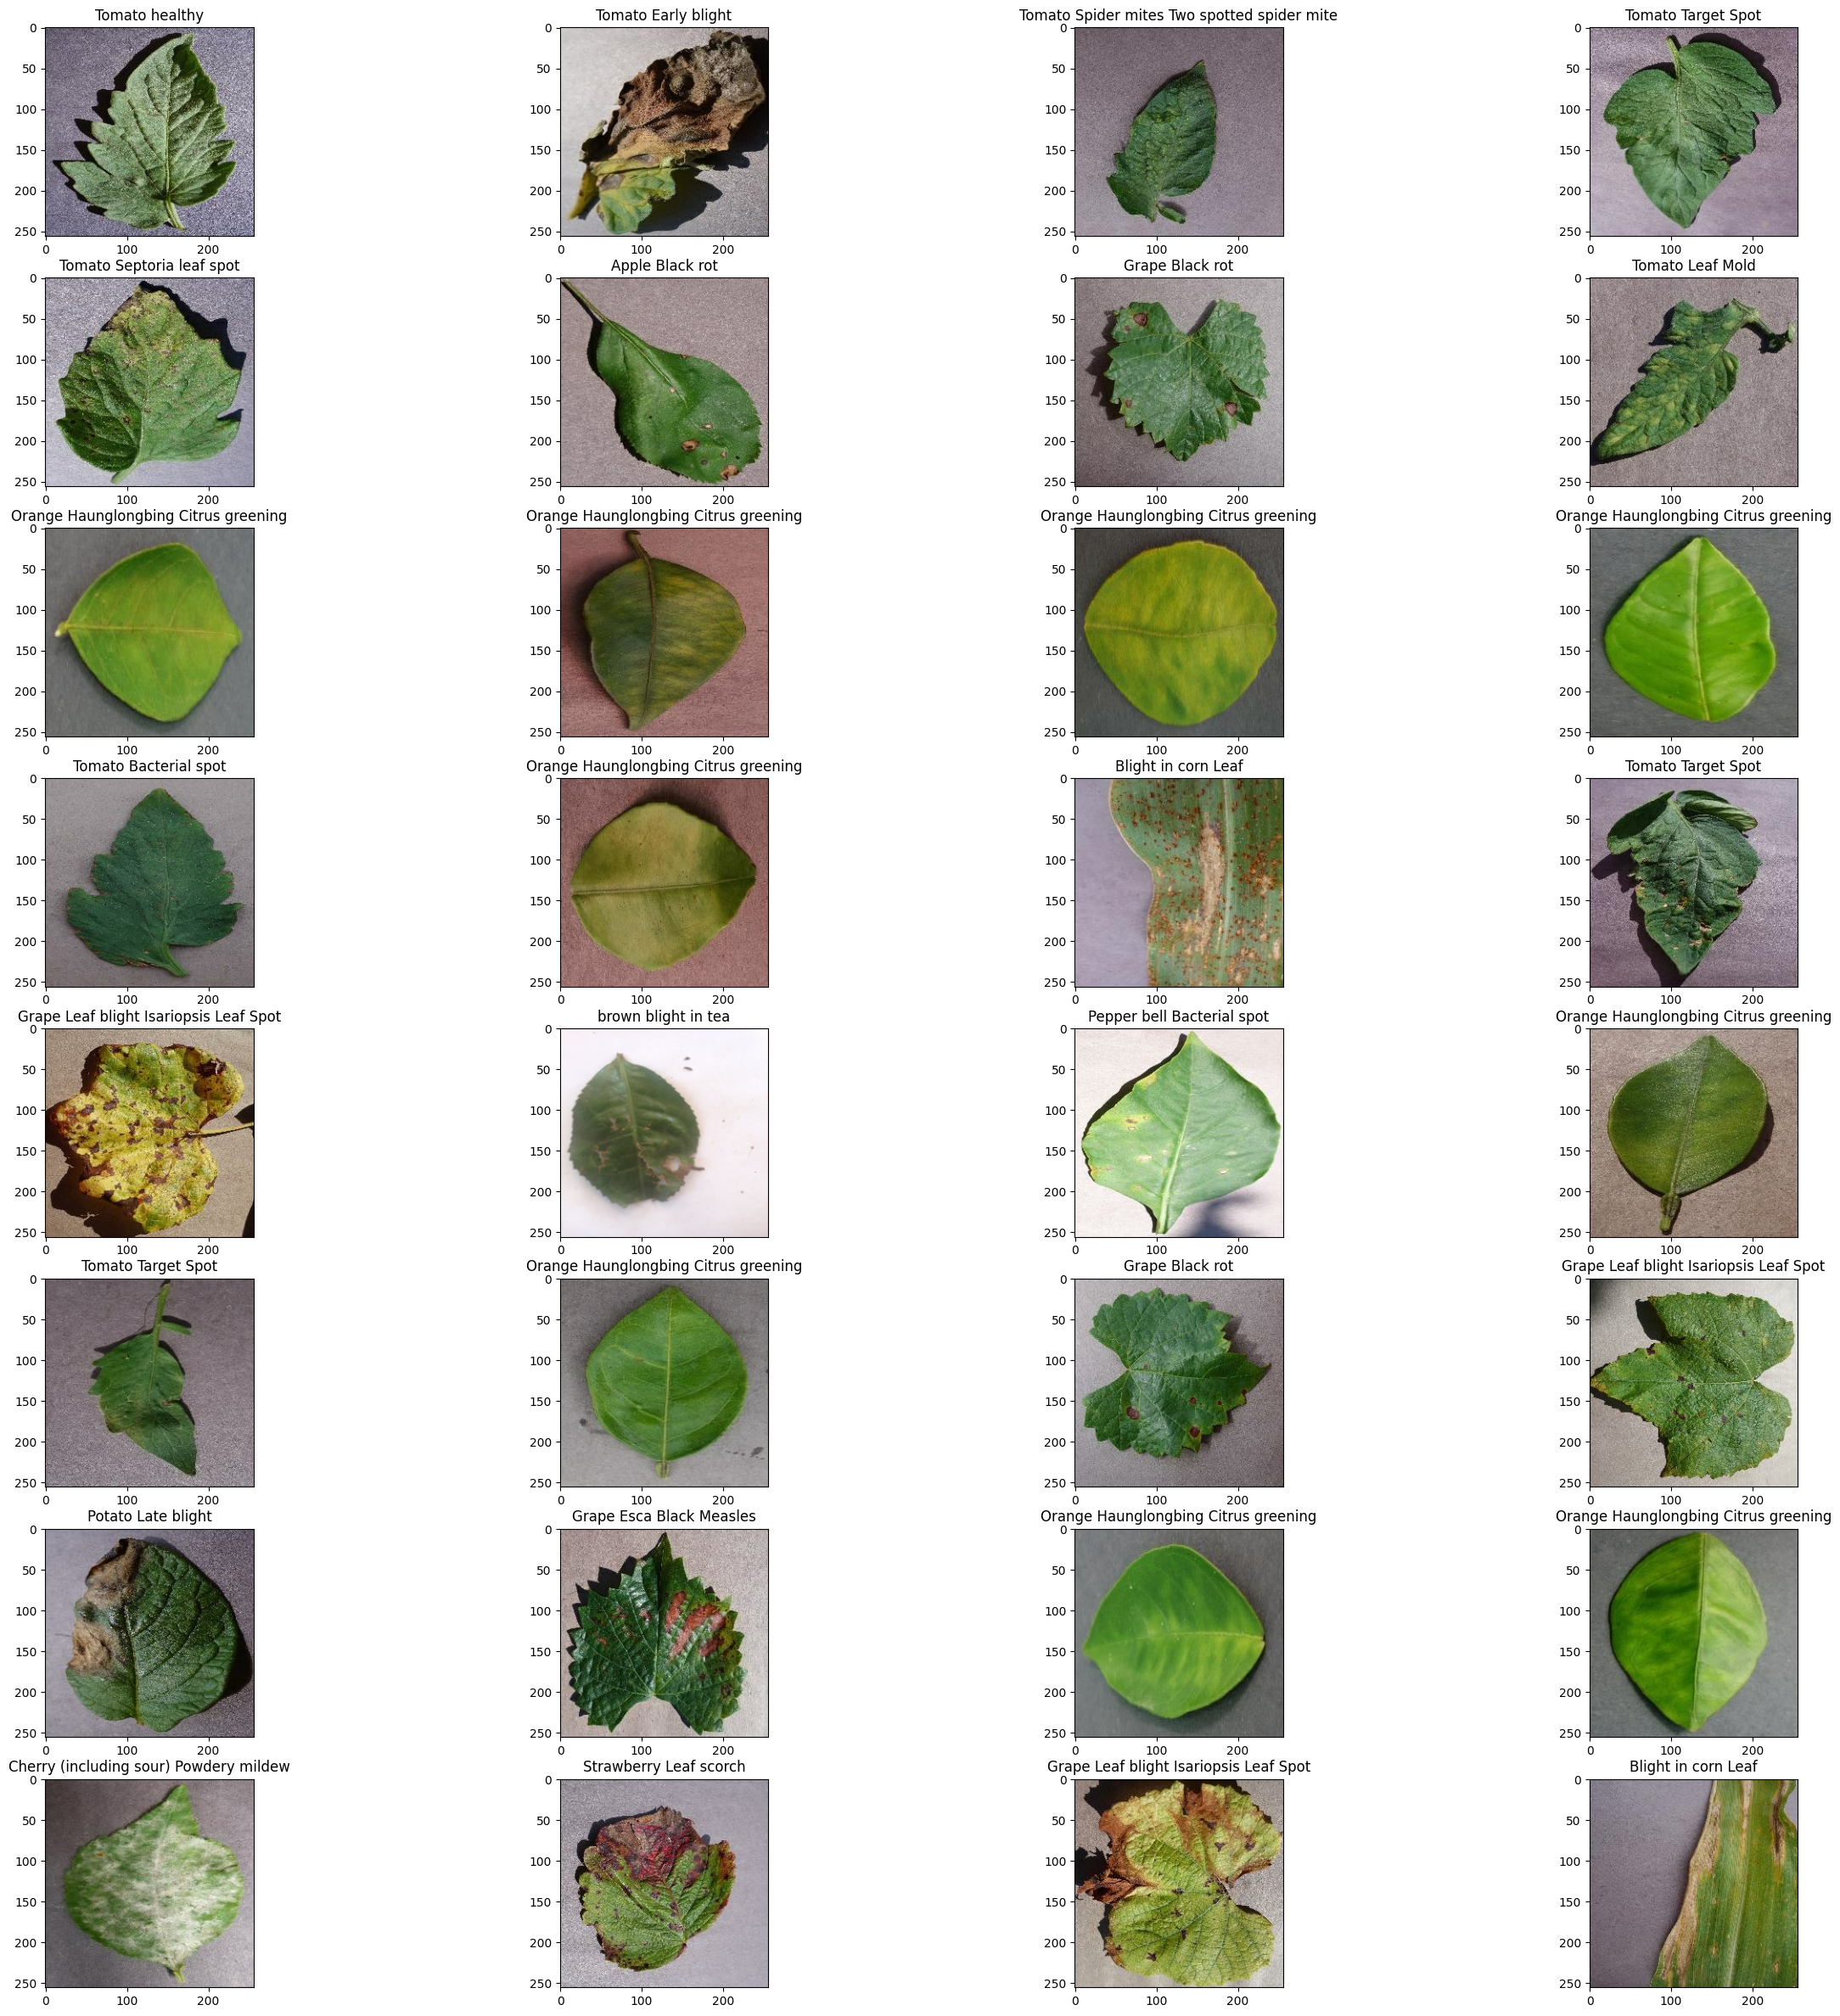

In [4]:
plt.figure(figsize=(30,30))
for i,j in dataset.take(1):
    for k in range(0,32):
        plt.subplot(8,4,k+1)
        plt.imshow(i[k].numpy().astype('uint8'))
        plt.title(labels[j[k]])

In [5]:
cure={
    "potato hollow heart": "Growing potatoes is fraught with mystery and surprises, especially for the beginning gardener. Even when your potato crop comes out of the ground looking perfect, the tubers can have internal defects that make them appear to be diseased. Hollow heart in potatoes is a common problem caused by alternating periods of slow and fast growth. Read on to learn more about hollow heart disease in potatoes. Prevention If hollow heart plagues your garden, waiting until the soil has reached 60 F. (16 C.) may help prevent sudden growth. A layer of black plastic can be used to warm the soil artificially if your growing season is short and potatoes must go out early. There is no control once disease is present. Severely infected (stunted) plants should be removed immediately to prevent virus spread. These diseases can be reduced by planting certified potato seed tubers. ",
    "lemon canker": "Citrus canker is a disease affecting Citrus species caused by the bacterium Xanthomonas axonopodis. Infection causes lesions on the leaves, stems, and fruit of citrus trees, including lime, oranges, and grapefruit. While not harmful to humans, canker significantly affects the vitality of citrus trees, causing leaves and fruit to drop prematurely; a fruit infected with canker is safe to eat, but too unsightly to be sold. Treatment of bacterial canker is generally mechanical, with the infected branches being removed using sterile pruning tools. Wait until late winter, if at all possible, and cauterize the wound with a hand-held propane torch to prevent reinfection by bacterial canker. Prevention of primary infection in the new sprouts perhaps is the major effective approach to reduce citrus canker spread. The eradication methodology comprises conducting periodic surveys of the orchard, identifying and eliminating the outbreaks of the disease before its proliferation.",
    "Cercospora leaf spot": "Cercospora is a genus of ascomycete fungi. Most species have no known sexual stage, and when the sexual stage is identified, it is in the genus Mycosphaerella. Most species of this genus cause plant diseases, and form leaf spots. It is a relatively well-studied genus of fungus, but there are countless species n Fungicides are available to manage Cercospora leaf spot. Avoid overwatering or watering in the late evening to reduce free moisture. Avoid overhead watering where the water can dislodge and disperse spores to uninfected plants. Space plants to encourage air movement and reduce high humidity levels. ot yet described, and there is still much to learn about the best-known of the species.",
    "tomato canker": "A plant canker is a small area of dead tissue, which grows slowly, often over years. Some cankers are of only minor consequence, but others are ultimately lethal and therefore can have major economic implications for agriculture and horticulture. Their causes include such a wide range of organisms as fungi, bacteria, mycoplasmas and viruses. The majority of canker-causing organisms are bound to a unique host species or genus, but a few will attack other plants. Weather and animals can spread canker, thereby endangering areas that have only slight amount of canker. Wilt caused by bacterial canker Plant certified pathogen-free seed from a reputable supplier. Do not save seed from infected plants. Treat any saved seed prior to planting. Soak seeds in a solution of 1 part germicidal bleach to 4 parts water for 1 minute.",
    "cabbage looper": "The cabbage looper (Trichoplusia ni) is a medium-sized moth in the family Noctuidae, a family commonly referred to as owlet moths. Its common name comes from its preferred host plants and distinctive crawling behavior. Cruciferous vegetables, such as cabbage, bok choy, and broccoli, are its main host plant; hence, the reference to cabbage in its common name.[1] The larva is called a looper because it arches its back into a loop when it crawls. Bacillus thuringiensis and most other selective insecticides are very effective against cabbage loopers, especially when applied to early-instar caterpillars (i.e., very young). Cabbage loopers are also controlled with the more toxic materials recommended for use against other lepidopterous (caterpillar) pests.",
    "Sogatella rice": "Sogatella is a genus of delphacid planthoppers in the family Delphacidae. There are more than 20 described species in Sogatella. To prevent outbreaks of Sogatella rice : Remove weeds from the field and surrounding areas. Avoid indiscriminate use of insecticide, which destroys natural enemies. Use a resistant variety.  Critical numbers: At a density of 1 BPH/stem or less there is still time to act in case the numbers increase.",
    "Nitrogen deficiency in plant": "Nitrogen deficiency is a deficiency of nitrogen in plants. This can occur when organic matter with high carbon content, such as sawdust, is added to soil.[1] Soil organisms use any nitrogen available to break down carbon sources, making nitrogen unavailable to plants.[1] This is known as robbing the soil of nitrogen. All vegetables apart from nitrogen fixing legumes are prone to this disorder. Treatment put some urea fertilizer in your plants",
    "potassium deficiency in plant": "Potassium deficiency, also known as potash deficiency, is a plant disorder that is most common on light, sandy soils, because potassium ions (K+) are highly soluble and will easily leach from soils without colloids.[1] Potassium deficiency is also common in chalky or peaty soils with a low clay content. It is also found on heavy clays with a poor structure.  Treatment put some muriate of potash in your plants",
    "Waterlogging in plant": "Waterlogging is the saturation of soil with water.[1] Soil may be regarded as waterlogged when it is nearly saturated with water much of the time such that its air phase is restricted and anaerobic conditions prevail. In extreme cases of prolonged waterlogging, anaerobiosis occurs, the roots of mesophytes suffer, and the subsurface reducing atmosphere leads to such processes as denitrification, methanogenesis, and the reduction of iron and manganese oxides.[2]  In agriculture, various crops need air (specifically, oxygen) to a greater or lesser depth in the soil. Waterlogging of the soil stops air getting in. How near the water table must be to the surface for the ground to be classed as waterlogged, varies with the purpose in view. A crop's demand for freedom from waterlogging may vary between seasons of the year, as with the growing of rice",
    "water deficiency in plant": "Moisture stress is a form of abiotic stress that occurs when the moisture of plant tissues is reduced to suboptimal levels. Water stress occurs in response to atmospheric and soil water availability when the transpiration rate exceeds the rate of water uptake by the roots and cells lose turgor pressure. Moisture stress is described by two main metrics, water potential and water content.[1][2][3]  Moisture stress has an effect on stomatal opening, mainly causing a closure in stomata as to reduce the amount of carbon dioxide assimilation.[4] Closing of the stomata also slows the rate of transpiration, which limits water loss and helps to prevent the wilting effects of moisture stress.[5] This closing can be trigged by the roots sensing dry soil and in response producing the hormone ABA which when transported up the xylem into the leaves will reduce stomatal conductance and wall extensibility of growing cells. This lowers the rates of transpiration, photosynthesis and leaf expansion. ABA also increases the loosening of growing root cell walls and in turn increases root growth in an effort to find water in the soil.[6]  Phenotypic response of plants to long-term water stress was measured in corn and showed that plants respond to water stress with both an increase in root growth both laterally and vertically.[7] In all Droughted conditions the corn showed decrease in plant height and yield due to the decrease in water availability.[8]  Genes induced during water-stress conditions are thought to function not only in protecting cells from water deficit by the production of important metabolic proteins but also in the regulation of genes for signal transduction in the water-stress response. There are four pathways that have been described that show the plants genetic response to moisture stress; two are ABA dependent while two are ABA independent. They all affect gene expression that increases the plants water stress tolerance",
    "onion": "The onion' (Allium cepa L., from Latin word 'cepa meaning onion), also known as the bulb onion or common onion, is a vegetable that is the most widely cultivated species of the genus Allium. The shallot is a botanical variety of the onion which was classified as a separate species until 2010.[2][3]: 21   Its close relatives include garlic, scallion, leek, chive,[4] and Chinese onion.[5]  This genus also contains several other species variously referred to as onions and cultivated for food, such as the Japanese bunching onion (Allium fistulosum), the tree onion (A. ×proliferum), and the Canada onion (Allium canadense). The name wild onion is applied to a number of Allium species, but A. cepa is exclusively known from cultivation. Its ancestral wild original form is not known, although escapes from cultivation have become established in some regions.[6] The onion is most frequently a biennial or a perennial plant, but is usually treated as an annual and harvested in its first growing season.",
    "corn": "Maize (/meɪz/ MAYZ; Zea mays subsp. mays, from Spanish: maíz after Taino: mahiz), also known as corn (North American and Australian English), is a cereal grain first domesticated by indigenous peoples in southern Mexico about 10,000 years ago.[1][2] The leafy stalk of the plant produces pollen inflorescences and separate ovuliferous inflorescences called ears that yield kernels or seeds, which are fruits.[3]",
    "ginger": "Ginger (Zingiber officinale) is a flowering plant whose rhizome, ginger root or ginger, is widely used as a spice and a folk medicine.[2] It is a herbaceous perennial which grows annual pseudostems (false stems made of the rolled bases of leaves) about one meter tall bearing narrow leaf blades. The inflorescences bear flowers having pale yellow petals with purple edges, and arise directly from the rhizome on separate shoots.[3]",
    "Garlic": "Allium sativum is a perennial flowering plant growing from a bulb. It has a tall, erect flowering stem that grows up to 1 m (3 ft). The leaf blade is flat, linear, solid, and approximately 1.25–2.5 cm (0.5–1.0 in) wide, with an acute apex. The plant may produce pink to purple flowers from July to September in the Northern Hemisphere. The bulb is odoriferous and contains outer layers of thin sheathing leaves surrounding an inner sheath that encloses the clove. Often the bulb contains 10 to 20 cloves that are asymmetric in shape, except for those closest to the center.[6] If garlic is planted at the proper time and depth, it can be grown as far north as Alaska.[10] It produces hermaphrodite flowers. It is pollinated by bees, butterflies, moths, and other insects.[11] ",
    "potato": "The potato is a starchy tuber of the plant Solanum tuberosum and is a root vegetable native to the Americas. The plant is a perennial in the nightshade family Solanaceae.[2]  Wild potato species can be found throughout the Americas, from Canada to southern Chile.[3] The potato was originally believed to have been domesticated by Native Americans independently in multiple locations,[4] but later genetic studies traced a single origin, in the area of present-day southern Peru and extreme northwestern Bolivia. Potatoes were domesticated there approximately 7,000–10,000 years ago, from a species in the Solanum brevicaule complex.[5][6][7] In the Andes region of South America, where the species is indigenous, some close relatives of the potato are cultivated.  Potatoes were introduced to Europe from the Americas in the second half of the 16th century by the Spanish. Today they are a staple food in many parts of the world and an integral part of much of the world's food supply. As of 2014, potatoes were the world's fourth-largest food crop after maize (corn), wheat, and rice.[8] Following millennia of selective breeding, there are now over 5,000 different types of potatoes.[6] Over 99% of potatoes presently cultivated worldwide descended from varieties that originated in the lowlands of south-central Chile.[9] The importance of the potato as a food source and culinary ingredient varies by region and is still changing. It remains an essential crop in Europe, especially Northern and Eastern Europe, where per capita production is still the highest in the world, while the most rapid expansion in production over the past few decades has occurred in southern and eastern Asia, with China and India leading the world in overall production as of 2018.  Like the tomato, the potato is a nightshade in the genus Solanum, and the vegetative and fruiting parts of the potato contain the toxin solanine which is dangerous for human consumption. Normal potato tubers that have been grown and stored properly produce glycoalkaloids in amounts small enough to be negligible to human health, but, if green sections of the plant (namely sprouts and skins) are exposed to light, the tuber can accumulate a high enough concentration of glycoalkaloids to affect human health.If you have had problems with bacterial blight, you may want to use a combination of copper and mancozeb-containing fungicides for control. Apply fungicides two to three times at seven to 10 day intervals as leaves emerge, but before symptoms develop.",
    "Bacterial leaf blight in rice leaf": "rice bacterial blight, also called bacterial blight of rice, deadly bacterial disease that is among the most destructive afflictions of cultivated rice (Oryza sativa and O. glaberrima). In severe epidemics, crop loss may be as high as 75 percent, and millions of hectares of rice are infected annually.     Use balanced amounts of plant nutrients, especially nitrogen.Ensure good drainage of fields (in conventionally flooded crops) and nurseries.Keep fields clean.Allow fallow fields to dry in order to suppress disease agents in the soil and plant residues.",
    "Brown spot in rice leaf": "Cochliobolus miyabeanus (formerly known as Helminthosporium oryzae) is a fungus that causes brown spot disease in rice.Seed treatment with tricyclazole followed by spraying of mancozeb + tricyclazole at tillering and late booting stages gave good control of the disease. Application of edifenphos, chitosan, iprodione, or carbendazim in the field is also advisable.Solution: First, isolate your plant so other plants don't get infected. Cut off any leaves with spots on them and let your plant dry out. Only water it when the top two inches of soil feel dry. This method may beat a mild case, but in severe cases it may be best to dispose of the plant.",
    "Leaf smut in rice leaf": "Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice. The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves (Figure 1).Cleaning up debris at the end of each growing season can prevent spread of leaf smut. Keeping a good nutrient balance is also important, as high nitrogen levels increases the incidence of the disease. Finally, if leaf smut has been a problem in your growing area, consider using rice varieties with some resistance.Control includes growing resistant varieties in noninfested soil, treating seeds with a fungicide, using disease-free transplants, and destroying infected plants or plant parts before the spores are released.In general, azoxystrobin, pyraclostrobin, or fluoxastrobin applications will control gray leaf spot for 28 days. The other three fungicides will control the disease for 14 days. Irrigate according to label directions after application of granular products.",
    "Gray Leaf Spot in corn Leaf": "Gray leaf spot is typically the most serious foliar disease of corn in the U.S. corn belt, although other diseases can be more important in areas and years where weather conditions do not favor gray leaf spot. Gray leaf spot requires extended periods of high humidity and warm conditions.Gray leaf spot on corn, caused by the fungus Cercospora zeae-maydis, is a peren- nial and economically damaging disease in the United States. Since the mid-1990s, the disease has increased in importance in Indiana, and now is the one of the most important foliar diseases of corn in the state.To reduce the incidence of corn rust, plant only corn that has resistance to the fungus. Resistance is either in the form of race-specific resistance or partial rust resistance. In either case, no sweet corn is completely resistant. If the corn begins to show symptoms of infection, immediately spray with a fungicide",
    "Common Rust in corn Leaf": "Common rust produces rust-colored to dark brown, elongated pustules on both leaf surfaces. The pustules contain rust spores (urediniospores) that are cinnamon brown in color. Pustules darken as they age. Leaves, as well as sheaths, can be infected.Common rust is caused by the fungus Puccinia sorghi. Late occurring infections have limited impact on yield. The fungus overwinters on plants in southern states and airborne spores are wind-blown to northern states during the growing season.",
    "Blight in corn Leaf": "Northern corn leaf blight (NCLB) is caused by the fungus Setosphaeria turcica. Symptoms usually appear first on the lower leaves.Treating northern corn leaf blight involves using fungicides. For most home gardeners this step isn't needed, but if you have a bad infection, you may want to try this chemical treatment. The infection usually begins around the time of silking, and this is when the fungicide should be applied.Northern corn leaf blight (NCLB), caused by the fungus Exserohilum turcicum, is an increasingly important disease in the U.S. Corn Belt. The disease has appeared annually in Indiana, and has increased in prevalence since the mid- to late 2000s",
    "Tomato Tomato mosaic virus": "Tomato mosaic virus (ToMV) is a plant pathogenic virus. It is found worldwide and affects tomatoes and many other plants.Once plants are infected, there is no cure for mosaic viruses. Because of this, prevention is key! However, if plants in your garden do show symptoms of having mosaic viruses, here's how to minimize the damage: Remove all infected plants and destroy them.There are many viruses that can infect tomatoes. They are often capable of infecting many other species of plants as well. For example, tomato mosaic virus most often infects tomatoes, but can also infect pepper, potato, apple, pear, cherry and numerous weeds, including pigweed and lamb's quarters",
    "Tomato Target Spot": "Also known as early blight, target spot of tomato is a fungal disease that attacks a diverse assortment of plants, including papaya, peppers, snap beans, potatoes, cantaloupe, and squash as well as passion flower and certain ornamentals.The black spots on tomatoes look leathery. When you try to cut off the patch to eat the tomato, the fruit inside looks mealy. What causes it: Your plants aren't getting enough calcium. There's either not enough calcium in the soil, or the pH is too low for the plant to absorb the calcium available.",
    "Tomato Spider mites Two spotted spider mite": "The two-spotted spider mite is the most common mite species that attacks vegetable and fruit crops in New England. Spider mites can occur in tomato, eggplant, potato, vine crops such as melons, cucumbers, and other crops. Two-spotted spider mites are one of the most important pests of eggplant.The best way to begin treating for two-spotted mites is to apply a pesticide specific to mites called a miticide. Ideally, you should start treating for two-spotted mites before your plants are seriously damaged. Apply the miticide for control of two-spotted mites every 7 days or so",
    "Tomato Septoria leaf spot": "Septoria leaf spot is caused by a fungus, Septoria lycopersici. It is one of the most destructive diseases of tomato foliage and is particularly severe in areas where wet, humid weather persists for extended periods. Septoria leaf spot usually appears on the lower leaves after the first fruit sets.Removing infected leaves. Remove infected leaves immediately, and be sure to wash your hands and pruners thoroughly before working with uninfected plants.Consider organic fungicide options.Consider chemical fungicides.",
    "Tomato Leaf Mold": "What is tomato leaf mold? Tomato leaf mold is a fungal disease that can develop when there are extended periods of leaf wetness and the relative humidity is high (greater than 85 percent). Due to this moisture requirement, the disease is seen primarily in hoophouses and greenhouses.Baking soda solution: Mix 1 tablespoon baking soda and ½ teaspoon liquid soap such as Castile soap (not detergent) in 1 gallon of water. Spray liberally, getting top and bottom leaf surfaces and any affected areas.When treating tomato plants with fungicide, be sure to cover all areas of the plant that are above the soil, especially the underside of leaves, where the disease often forms. Calcium chloride-based sprays are recommended for treating leaf mold issues. Organic fungicide options are also available.",
    "Tomato Late blight": "Late blight is a potentially devastating disease of tomato and potato, infecting leaves, stems, tomato fruit, and potato tubers. The disease spreads quickly in fields and can result in total crop failure if untreated. Late blight does not occur every year in Minnesota.Avoid planting tomatoes on sites that were previously in potatoes or close to potatoes. Sequential planting or planting several crops of tomatoes over time will reduce the risk of late blight destroying all tomatoes at once. Spraying fungicides is the most effective way to prevent late blight.Late blight is not a treatable disease and it will kill your plants. In addition, late blight is highly communicable disease that is carried on wind and will infect other gardens and farms within a 50-mile radius. So it is important to destroy infected plants once you confirm you have late blight.",
    "Tomato Early blight": "The main symptom of early blight is round leaf spots with a characteristic target appearance due to the dark concentric rings that develop in most spots. They are about .5 inch in diameter. Spots first appear on older leaves near the base of the plant. The causal fungal pathogen also produces symptoms on stems and fruit. Young seedlings can be killed by stem lesions developing at their base. Sources of the pathogen are infested seed, debris from infected plants left in or on the soil (where it can survive at least 1 year), and spores from other affected plants dispersed typically short distances by wind, water, insects, or animals.Early blight can be minimized by maintaining optimum growing conditions, including proper fertilization, irrigation, and management of other pests. Grow later maturing, longer season varieties. Fungicide application is justified only when the disease is initiated early enough to cause economic loss.",
    "Tomato Bacterial spot": "Bacterial spot of tomato is caused by Xanthomonas vesicatoria, Xanthomonas euvesicatoria, Xanthomonas gardneri, and Xanthomonas perforans. These bacterial pathogens can be introduced into a garden on contaminated seed and transplants, which may or may not show symptoms.Remove old vegetable debris in the garden and do not plant new crops where host plants were once growing. There are no recognized chemical treatments for bacterial leaf spot disease. Your best bet is prevention and mechanical control at the first sign of symptoms of bacterial leaf spot.",
    "Potato Late blight": "late blight, also called potato blight, disease of potato and tomato plants that is caused by the water mold Phytophthora infestans. The disease occurs in humid regions with temperatures ranging between 4 and 29 °C (40 and 80 °F). Hot dry weather checks its spread. Potato or tomato plants that are infected may rot within two weeks. The Great Famine in Ireland in the mid-19th century was caused by late blight of the potato plant. Late blight destroyed more than half of the tomato crop in the eastern United States in 1946, leading to the establishment of a blight-forecasting service in 1947. A number of such forecasting services are maintained at universities and governmental organizations across the world.Late blight is controlled by eliminating cull piles and volunteer potatoes, using proper harvesting and storage practices, and applying fungicides when necessary. Air drainage to facilitate the drying of foliage each day is important.",
    "Potato Early blight": "Early blight of potato is caused by the fungal pathogen Alternaria solani. The disease affects leaves, stems and tubers and can reduce yield, tuber size, storability of tubers, quality of fresh-market and processing tubers and marketability of the crop.Treatment of early blight includes prevention by planting potato varieties that are resistant to the disease; late maturing are more resistant than early maturing varieties. Avoid overhead irrigation and allow for sufficient aeration between plants to allow the foliage to dry as quickly as possible.The first sign of potato blight is dark blotches on the leaves, starting at the leaf tips and edges. They then spread, causing the foliage to shrivel and collapse. Blotches also appear on the stems, which turn black and rot.",
    "Pepper bell Bacterial spot": "Bacterial spot is one of the most devastating diseases of pepper and tomato. The disease occurs worldwide where pepper and tomato are grown in warm, moist areas. When it occurs soon after transplanting and weather conditions remain favorable for disease development, the results are usually total crop loss.When plants are infected by bacterial leaf spot, the plant yield will be significantly reduced. The fruit is still edible, but in severe cases is not marketable. Brown, scab-like lesions may form and while the lesions themselves will not rot the fruit, they make the fruit more susceptible to other diseases and insects.Seed treatment with hot water, soaking seeds for 30 minutes in water pre-heated to 125 F/51 C, is effective in reducing bacterial populations on the surface and inside the seeds. However, seed germination may be affected by heat treatment if not done accurately, while the risk is relatively low with bleach treatment.",
    "Apple Apple scab": "Apple scab is a common disease of plants in the rose family (Rosaceae) that is caused by the ascomycete fungus Venturia inaequalis. While this disease affects several plant genera including Sorbus, Cotoneaster, and Pyrus, it is most commonly associated with the infection of Malus trees, including species of flowering crabapple, as well as cultivated apple. The first symptoms of this disease are found in the foliage, blossoms, and developing fruits of affected trees, which develop dark, irregularly-shaped lesions upon infection. Although apple scab rarely kills its host, infection typically leads to fruit deformation and premature leaf and fruit drop, which enhance the susceptibility of the host plant to abiotic stress and secondary infection. The reduction of fruit quality and yield may result in crop losses of up to 70%, posing a significant threat to the profitability of apple producers.[6] To reduce scab-related yield losses, growers often combine preventive practices, including sanitation and resistance breeding, with reactive measures, such as targeted fungicide or biocontrol treatments, to prevent the incidence and spread of apple scab in their crops.Remove and destroy the fallen leaf litter so that the fungus cannot overwinter. ...Do not overcrowd plants, and make sure the canopy has proper airflow. ...Fungicide applications at 2-week intervals beginning when new growth is expanding in the spring .The best fungicides available for scab control at this time of the early season are the broad-spectrum protectants: Captan and the EBDCs. It is likely too late for copper (see previous article, “An early-season copper application will help avoid feeling 'the blues' about diseases”).",
    "Apple Black rot": "Black rot is caused by the fungus Diplodia seriata (syn Botryosphaeria obtusa). The fungus can infect dead tissue as well as living trunks, branches, leaves and fruits. The black rot fungi survive Minnesota winters in branch cankers and mummified fruit (shriveled and dried fruit) attached to the tree.Mancozeb, and Ziram are all highly effective against black rot. Because these fungicides are strictly protectants, they must be applied before the fungus infects or enters the plant. They protect fruit and foliage by preventing spore germination. They will not arrest lesion development after infection has occurred.",
    "Apple Cedar apple rust": "These diseases require plants from two different families in order to complete their life cycle; one plant from the Cupressaceae family (red cedar, juniper) and the other from the Rosaceae family (crabapple, hawthorn, serviceberry). Symptoms are very different on each type of plant.Fungicides with the active ingredient Myclobutanil are most effective in preventing rust. ...Fungicides are only effective if applied before leaf spots or fruit infection appear.Spray trees and shrubs when flower buds first emerge until spring weather becomes consistently warm and dry.Monitor nearby junipers.",
    "Cherry (including sour) Powdery mildew": "Powdery mildew of sweet and sour cherry is caused by Podosphaera clandestina, an obligate biotrophic fungus. Mid- and late-season sweet cherry (Prunus avium) cultivars are commonly affected, rendering them unmarketable due to the covering of white fungal growth on the cherry surface (Fig. 1).You have a choice of low toxicity fungicides like horticultural oils. These include jojoba oil, neem oil, and brand name spray oils designed for fruit trees. Classic fungicides that are used against apple scab, such as sterol inhibitors, are highly effective at controlling powdery mildew.Powdery mildew rarely causes serious damage to its host, but infection by the fungus can discolor leaves, causing those leaves to die and/or drop. Powdery mildew can also infect, disfigure and deform shoots and flowers (Fig.",
    "Grape Black rot": "Grape black rot is a fungal disease caused by an ascomycetous fungus, Guignardia bidwellii, that attacks grape vines during hot and humid weather. “Grape black rot originated in eastern North America, but now occurs in portions of Europe, South America, and Asia. It can cause complete crop loss in warm, humid climates, but is virtually unknown in regions with arid summers.”[1] The name comes from the black fringe that borders growing brown patches on the leaves. The disease also attacks other parts of the plant, “all green parts of the vine: the shoots, leaf and fruit stems, tendrils, and fruit. The most damaging effect is to the fruit”.[2]Grape black rot affects many grape growers throughout the United States, therefore, it is important to understand the disease life cycle and environmental conditions to best manage the disease. Once infection takes place, different methods are available to control the disease.Mancozeb, and Ziram are all highly effective against black rot. Because these fungicides are strictly protectants, they must be applied before the fungus infects or enters the plant. They protect fruit and foliage by preventing spore germination. They will not arrest lesion development after infection has occurred",
    "Grape Esca Black Measles": "Grapevine measles, also called esca, black measles or Spanish measles, has long plagued grape growers with its cryptic expression of symptoms and, for a long time, a lack of identifiable causal organism(s). The name 'measles' refers to the superficial spots found on the fruit (Fig. 1).Rocky Mountain spotted fever is a tickborne disease first recognized in 1896 in the Snake River Valley of Idaho. It was originally called “black measles” because of the look of its rash in the late stages of the illness, when the skin turns black.Esca, Botryosphaeria dieback, Eutypa dieback, and Phomopsis dieback make up a complex of  caused by different wood-infecting fungi. The foliar symptom of Esca is an interveinal striping. The stripes, which start out as dark red in red cultivars and yellow in white cultivars, dry and become necrotic.",
    "Grape Leaf blight Isariopsis Leaf Spot": "Leaf blight, also called Isariopsis leaf spot (Pseudocercospora vitis) on Grape (Vitus sp.) Scattered, somewhat angular, purple-brown spots on upper leaf surface. Corresponding, less conspicuous, brown spots on lower leaf surface. Numerous scattered, somewhat angular, purple-brown spots on upper leaf surface.lime sulfur, sulfur or copper formulations to kill fungal spores that overwinter on the vine. “This is one of the things people don't always do, but especially if you had a lot of disease the previous year, dormant sprays are a good way to get a head start on the season.",
    "Orange Haunglongbing Citrus greening": "Citrus greening disease or HLB)[2] is a disease of citrus caused by a vector-transmitted pathogen. The causative agents are motile bacteria, Candidatus Liberibacter spp. The disease is vectored and transmitted by the Asian citrus psyllid, Diaphorina citri, and the African citrus psyllid, Trioza erytreae, also known as the two-spotted citrus psyllid. It has also been shown to be graft-transmissible.[3] Three different types of HLB are currently known: the heat-tolerant Asian form, and the heat-sensitive African and American forms. The disease was first described in 1929 and first reported in China in 1943. The African variation was first reported in 1947 in South Africa, where it is still widespread. Eventually, it affected the United States, reaching Florida in 2005. Within three years, it had spread to the majority of citrus farms. The rapid increase in this disease has threatened the citrus industry not only in Florida, but the entire US. As of 2009, 33 countries have reported HLB infection in their citrus crop.Apply aqueous dilutions to trees when new growth occurs to protect flushes of new leaves against transmission of the huanglongbing (HLB) pathogen Candidatus Liberibacter asiaticus by the Asian citrus psyllid (ACP). Retreatment interval is a minimum of 21 days.",
    "peach bacterial spot": "Leaf symptoms of bacterial spot on peaches and nectarines are generally dark, small lesions, often clustered at the leaf tip where water collects during dews and rain. Leaf tissue around lesions can turn yellow. The pathogen overwinters in dark, gummy branch tips, and diseased twigs.Infections affect the outer appearance of the fruit, but the flesh is safe to eat, she said. Infections appear as small purple or black flecks on the surface of peaches and apricots and as water-soaked spots on plums and nectarines.Compounds available for use on peach and nectarine for bacterial spot include copper, oxytetracycline (Mycoshield and generic equivalents), and syllit+captan; however, repeated applications are typically necessary for even minimal disease control.",
    "cherry (including sour) powdery mildew": "Powdery mildew of sweet and sour cherry is caused by Podosphaera clandestina, an obligate biotrophic fungus. Mid- and late-season sweet cherry (Prunus avium) cultivars are commonly affected, rendering them unmarketable due to the covering of white fungal growth on the cherry surface (Fig. 1).Vinegar – Similar to mouthwash, the acetic acid of vinegar can control powdery mildew. A mixture of 2-3 tablespoons of common apple cider vinegar, containing 5% acetic acid mixed with a gallon of water does job.Powdery mildew is one of the easiest plant diseases to recognize. Nevertheless, the symptoms of this unsightly disease can easily be mistaken for leaf spot disease, spray residue or injury, and nutrient deficiencies",
    "Strawberry Leaf scorch": "Diplocarpon earlianum is a fungus that causes leaf scorch, one of the most common leaf diseases of strawberry. This ascomycete produces disk-shaped, dark brown to black apothecia (0.25-1 mm) on advanced-stage lesions on strawberry leaves and leaf residues (Heidenreich and Turechek).Remove infected leaves and debris. Increase air circulation to encourage leaf drying. Consider resistant cultivars. Use fungicides if disease becomes severe.Leaf scorch is caused by the fungus Diplocarpon earliana. Symptoms of leaf scorch consist of numerous small, irregular, purplish spots or “blotches” that develop on the upper surface of leaves. The centers of the blotches become brownish.",
    "algal leaf in tea": "Cephaleuros virescens is an algal plant pathogen that infects tea, coffee and coconut plants, causing algal leaf spot or algal rust. Cephaleuros virescens as a parasite of guava leaves and fruit in Hawaii, causing a leaf and fruit spot disease.'Red rust' caused by Cephaleuros parasiticus Karst is the most important and lone algal disease of tea. The regular incidence of this disease and its effect on the growth and vigour as well as the yield potential of tea called for investigation into the phenology and appropriate remedy of this disease.Algal leaf spot can be reduced by maintaining tree vigor with cultural techniques such as proper fertilization and irrigation, proper pruning to enhance air circulation within the canopy and sunlight penetration, managing weeds and wider tree spacing.",
    "anthracnose in tea": "The raw materials for tea products, the buds and leaves of the tea plant, are affected by a number of diseases. Of these diseases, anthracnose caused by Colletotrichum spp. is one of the most serious diseases2. Leaves infected by Colletotrichum generally have water-soaked lesions at the initial stage of the disease.Anthracnose disease is induced by the fungus Colletotrichum lagenarium, and the characteristic symptoms include small, yellowish watery spots that enlarge rapidly to become brownish. Oblong lesions then develop on the stems often resulting in death of plants. On fruits, round black sunken cankers occur.anthracnose, a group of fungal diseases that affect a variety of plants in warm, humid areas. Shade trees such as sycamore, ash, oak, and maple are especially susceptible, though the disease is found in a number of plants, including grasses and annuals. Anthracnose causes the wilting, withering, and dying of tissues.",
    "bird eye spot in tea": "The causal agent of Bird's eye spot disease in tea plants was isolated on PDA and identified as Cercospora theae Petch. Three isolates were obtained from the infected tea leaves in Koppa area of Karnataka (KC10), Munnar of Kerala (MC24) and Valparai of Tamil Nadu (VC38).Prevalence of the leaf spot disease in tea estates of South India among 38 clones and seedlings that are widely cultivated for commercial purpose of manufacturing tea was studied. The disease was surveyed in 13344 hectares using quadrates sampling on bushy canopy. The disease severity was more on UPASI clones and areas like Wynaad and Central Travancore of Kerala were severely affected by the disease. UPASI clones such as UPASI-3, 17, 19 and 25-27, and Sri Lankan clones, like TRI-2024 and TRI-2025 showed less than 30% disease index. The popular private estate clones such as SA-6, BSS-1, ATK-1 and BSB-1 were tolerant to the disease. The disease severity of tea clones depended on the sandy loam soil type and severity of drought in the respective planting districts. The causal agent of Bird’s eye spot disease in tea plants was isolated on PDA and identified as Cercospora theae Petch. Three isolates were obtained from the infected tea leaves in Koppa area of Karnataka (KC10), Munnar of Kerala (MC24) and Valparai of Tamil Nadu (VC38). All the isolates showed minor variations in terms of mycelial growth, culture characteristics and in vitro life cycle. The pathogen could invade the leaf tissue by both inter-cellular and intra-cellular invasions. C. theae produced erupting perithecium initially in the upper epidermis followed by lower epidermis in late infection stage. Perithecia were orange red whose conidia were cylindrical, 1-3 septa and produced by apical budding and its size varies from 38-68 x 4-5 μm. Pathogenicity of the three isolates were confirmed by their virulence in potted plants. The life cycle of the three isolates in detached leaves varied among isolates ranging from 19 d in MC24 to 21d in KC10 and VC38. Key words: Tea, Cercospora theae, bird’s eye spot disease, life cycle, growth pattern, spore germination Citation: Gnanamangai BM and Ponmurugan P. 2010. Bird’s eye spot disease (Cercospora theae) in tea estates of South India. J Mycol Pl Pathol 40(3):387-391.",
    "brown blight in tea": "Brown blight disease is one of the foliar diseases of tea (Camellia sinensis) prevalent in China, Japan, Sri Lanka, and India. This disease is a serious concern for the tea industry, due to both the reduced tea yield and quality decrease.Disease is also called as Poria root disease of tea. First symptoms appear as yellowing of the leaf followed by wilting and then sudden death of the bush or entire bush with the weathered leaves are attached to the stem for several days.The blister blight disease is one such serious foliar tea disease caused by the obligate biotrophic fungus Exobasidium vexans. E. vexans, belonging to the phylum basidiomycete primarily infects the young succulent harvestable tea leaves and results in ~40% yield crop loss.",
    "red leaf spot in tea": "Tea leaf diseases seriously affect the quality and the yield of tea. In order to determine whether the tea leaves are infected by diseases or any types of infection, technical support is essential for taking appropriate measures of disease control. Images of normal tea leaves, tea leaves infected with Tea Red Leaf Spot, and leaves infected with Tea Red Scab disease were studied. An identification algorithm for both of the tea leaf diseases based on hybrid feature optimization was proposed. First, the image features were extracted using the Histogram of Oriented Gradient and the Inception v3 model. Then, hybrid feature optimization processing was performed on two types of extracted features. Finally, the Gradient Boosting Decision Tree algorithm was used as the classifier for the identification of tea leaf diseases. Experiments demonstrate that the hybrid feature optimization algorithm reduces the image feature from 36, 068 to less than 150 dimensions while maintaining a high identification accuracy, which greatly reduces the complexity of the identification algorithm. At the same time, the identification accuracy of tea leaf diseases based on hybrid feature optimization algorithm were higher than 95%.Red leaf spot is a 'Helminthosporium' disease, which is a complex of diseases caused by fungi that produce large, cigar-shaped spores. Symptoms of red leaf spot appear in spots or irregular patches that are red or reddish-brown"

}

In [6]:
base=keras.Sequential()
base.add(hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5',input_shape=(224,224,3),trainable=False))

In [7]:
data_aug=keras.Sequential()
data_aug.add(keras.layers.experimental.preprocessing.Rescaling(1/255))
data_aug.add(keras.layers.experimental.preprocessing.Resizing(224,224))
data_aug.add(keras.layers.experimental.preprocessing.RandomFlip())
data_aug.add(keras.layers.experimental.preprocessing.RandomZoom(0.4))


In [8]:
train_size=np.round(199665/32) * 0.8
test_size=np.round(199665/32) * 0.2
validation_size=test_size*0.5

In [9]:
train=dataset.take(train_size)
test_data=dataset.skip(train_size)
val=test_data

In [10]:
len(labels)

58

In [11]:
cnn=keras.Sequential()
cnn.add(data_aug)
cnn.add(base)
cnn.add(Dense(58,activation='softmax'))

In [12]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
metrics=cnn.fit(train,epochs=5)

Epoch 1/5


4992/4992 [==============================] - 2010s 393ms/step - loss: 0.3055 - accuracy: 0.9109
Epoch 2/5
4992/4992 [==============================] - 2114s 423ms/step - loss: 0.1528 - accuracy: 0.9500
Epoch 3/5
4992/4992 [==============================] - 2132s 427ms/step - loss: 0.1283 - accuracy: 0.9577
Epoch 4/5
4992/4992 [==============================] - 2141s 429ms/step - loss: 0.1146 - accuracy: 0.9621
Epoch 5/5
4992/4992 [==============================] - 2122s 425ms/step - loss: 0.1111 - accuracy: 0.9629


In [14]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 2048)              58331648  
                                                                 
 dense (Dense)               (None, 58)                118842    
                                                                 
Total params: 58,450,490
Trainable params: 118,842
Non-trainable params: 58,331,648
_________________________________________________________________


In [15]:
cnn.evaluate(val)

1248/1248 [==============================] - 602s 308ms/step - loss: 0.1397 - accuracy: 0.9575


[0.13973334431648254, 0.9574660062789917]

In [16]:
metrics.history.keys()

dict_keys(['loss', 'accuracy'])

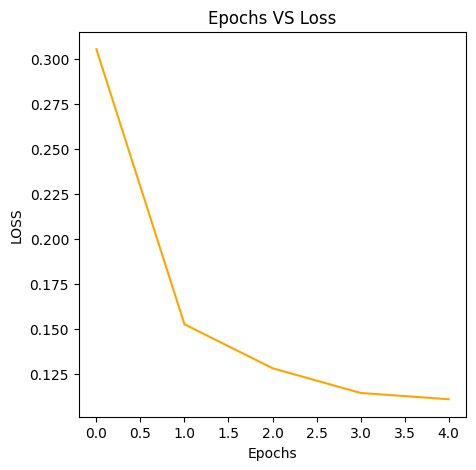

In [17]:
plt.figure(figsize=(5,5))
plt.plot(range(5),metrics.history['loss'],color='orange')
plt.ylabel('LOSS')
plt.xlabel('Epochs')
plt.title("Epochs VS Loss")
plt.show()

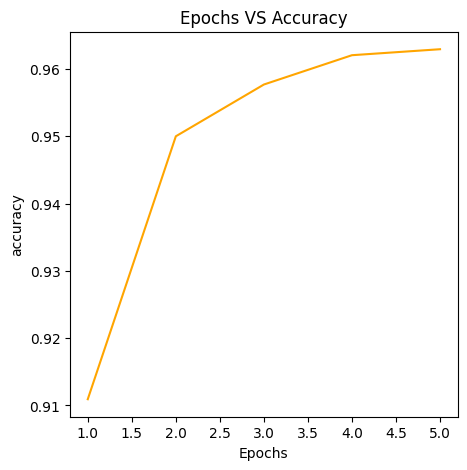

In [18]:
plt.figure(figsize=(5,5))
plt.plot(range(1,6),metrics.history['accuracy'],color='orange')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.title("Epochs VS Accuracy")
plt.show()

In [19]:
import PIL.Image
import cv2

In [20]:
img=cv2.imread('uploads/download.jpeg')
img=img[np.newaxis,...]
y_pred=cnn.predict(img)

1/1 [==============================] - 3s 3s/step


In [21]:
ans=np.argmax(y_pred)
conc=np.max(y_pred)
conf=np.round(conc*100,2)
ans,conf

(51, 100.0)

In [22]:
if 'healthy' in labels[ans]:
    print("The crop is {} , the confidence level for the match is {}% and there is no cure because the crop is healthy.".format(labels[ans],conf))

elif 'crop' in labels[ans]:
    print("This is healthy {} , the confidence level for the match is {}% and there is no need of cure.".format(labels[ans],conf))
else:
    print("The disease name is {} , the confidence level for the match is {}%  \nThe cure is :\n{}".format(labels[ans],conf,cure[labels[ans]]))

The disease name is lemon canker , the confidence level for the match is 100.0%  
The cure is :
Citrus canker is a disease affecting Citrus species caused by the bacterium Xanthomonas axonopodis. Infection causes lesions on the leaves, stems, and fruit of citrus trees, including lime, oranges, and grapefruit. While not harmful to humans, canker significantly affects the vitality of citrus trees, causing leaves and fruit to drop prematurely; a fruit infected with canker is safe to eat, but too unsightly to be sold. Treatment of bacterial canker is generally mechanical, with the infected branches being removed using sterile pruning tools. Wait until late winter, if at all possible, and cauterize the wound with a hand-held propane torch to prevent reinfection by bacterial canker. Prevention of primary infection in the new sprouts perhaps is the major effective approach to reduce citrus canker spread. The eradication methodology comprises conducting periodic surveys of the orchard, identif

In [23]:
cnn.save('model.h5')